# Social Dimensions of Eaton & Palisades Fires  
### Spatial Analysis & EJI Data Exploration  
This notebook explores fire perimeters for the Eaton and Palisades fires (Los Angeles County, 2025), intersects and clips them with 2024 Environmental Justice Index (EJI) census tract data, and produces exploratory maps for use in the final project blog post.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [33]:
pd.set_option('display.max_columns', None)

## Load Fire Perimeters and EJI Data

- We will use the GeoJSON files provided in the `fire_perimeters/` directory.
- The EJI dataset for California is stored as a geodatabase (`.gdb`).

In [2]:
# EJI data (geodatabase)
eji = gpd.read_file("data/EJI_2024_California/EJI_2024_California.gdb")

In [3]:
# Fire Perimeters (geojson)
palisades = gpd.read_file("data/fire_perimeters/Palisades_Perimeter_20250121.geojson")
eaton = gpd.read_file("data/fire_perimeters/Eaton_Perimeter_20250121.geojson")

# print(palisades.head())
# print(eaton.head())

# This is cool trick!
palisades.head(), eaton.head()

(   OBJECTID            type   Shape__Area  Shape__Length  \
 0         1  Heat Perimeter   1182.082031     267.101144   
 1         2  Heat Perimeter   2222.488281     185.498783   
 2         3  Heat Perimeter     21.011719      22.412814   
 3         4  Heat Perimeter    214.992188      76.639180   
 4         5  Heat Perimeter  44203.453125    1569.259764   
 
                                             geometry  
 0  POLYGON ((-118.51962 34.03061, -118.51962 34.0...  
 1  POLYGON ((-118.51944 34.03176, -118.51944 34.0...  
 2  POLYGON ((-118.52011 34.03244, -118.52011 34.0...  
 3  POLYGON ((-118.52061 34.03235, -118.52063 34.0...  
 4  POLYGON ((-118.52560 34.03302, -118.52560 34.0...  ,
    OBJECTID            type   Shape__Area  Shape__Length  \
 0         1  Heat Perimeter   2206.265625     270.199719   
 1         2  Heat Perimeter  20710.207031     839.204218   
 2         3  Heat Perimeter   3639.238281     250.304502   
 3         4  Heat Perimeter   1464.550781     148.

## 1. Metadata Exploration  
Look through the metadata CSV to understand variable descriptions.  
As a team, choose a few variables that influence wildfire vulnerability or response, such as:

- Percent of households without vehicles  
- Percent of population over 65  
- Poverty Index  
- Housing cost burden  
- Health risk indicators (e.g., asthma rates)  
- Social Vulnerability Index components  

The Environmental Justice Index (EJI) provides a indicators describing community conditions, environmental exposures, and health vulnerabilities at the census tract level. Each variable includes a name, description, units, and how it’s calculated.

Following is the three major categories:

- Environmental Burden Indicators
    * Air pollution (PM2.5, ozone levels)
    * Hazardous waste
    * climate risk measure (heat, flooding, wildfire potential)
- Social Vulnerability Indicators
    * Household income
    * Poverty rates
    * Disability status
    * Age distribution
- Health Vulnerability Indicators
    * Asthma rate
    * COPD rate
    * Diabetes rate
    * Cardiovasucular disease rate

There are also scores that measures the three categories.

- Composite Scores
    * Environmental Burden Score
    * Social Vulnerability Score
    * Health Vulnerability Score
    * Overall EJI Score

## 2. Polygon intersection
Open the fire perimeters and the EJI data and do initial data exploration.

Spatially join the EJI data with the Palisades fire perimeter using geopandas.sjoin() to get a `geopandas.GeoDataFrame` that will have only have the census tracts intersecting the Palisades fire perimeter.

Create an exploratory map showing the census tracts that intersect the Palisades fire perimeter and the Palisades fire perimeter.


In [4]:
palisades.crs, eaton.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [5]:
eji = eji.to_crs(epsg = 4326)

In [6]:
census_within_palisades = gpd.sjoin(eji, palisades, how = "inner", predicate = "intersects")
census_within_eaton = gpd.sjoin(eji, eaton, how = "inner", predicate = "intersects")

print("Palisades intersecting tracts:", len(census_within_palisades))
print("Eaton intersecting tracts:", len(census_within_eaton))

Palisades intersecting tracts: 36
Eaton intersecting tracts: 38


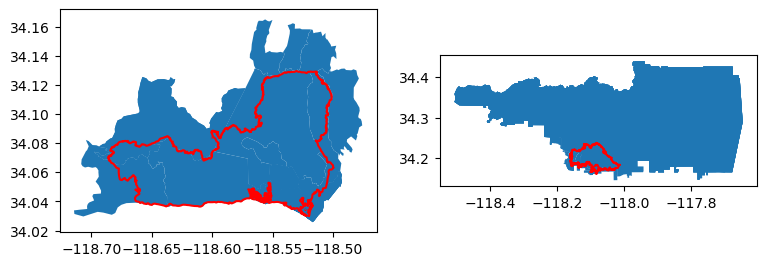

In [11]:
fig, ax = plt.subplots(figsize = (9, 5), nrows = 1, ncols = 2)

census_within_palisades.plot(ax = ax[0])
palisades.boundary.plot(ax = ax[0], color = 'red')
census_within_eaton.plot(ax = ax[1])
eaton.boundary.plot(ax = ax[1], color = 'red')

plt.show()

## 3. Spatial Join — Identify Census Tracts Intersecting Fire Perimeters  
We use `geopandas.sjoin()` with the predicate `"intersects"` to select only the census tracts touched by each fire.

#### 3a. Exploratory Maps: Census Tracts Intersecting Fire Perimeters  
Maps will show:
- Fire perimeter boundaries  
- Census tracts intersecting the perimeter

#### Discussion Prompt  
How large is each fire perimeter relative to the census tracts it intersects?  
Does one fire span more densely subdivided areas than the other?


## 4. Polygon Clipping  
Now we clip census tracts to the exact fire boundary using `geopandas.clip()`.  
Clipping modifies geometry to match fire boundaries.

In [12]:
palisades_clipped = gpd.clip(census_within_palisades, palisades)
eaton_clipped = gpd.clip(census_within_eaton, eaton)

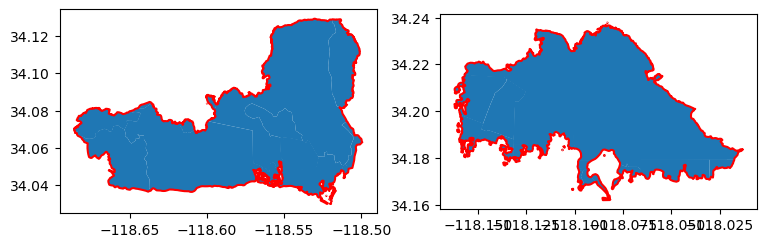

In [13]:
fig, ax = plt.subplots(figsize = (9, 5), nrows = 1, ncols = 2)

palisades_clipped.plot(ax = ax[0])
palisades.boundary.plot(ax = ax[0], color = 'red')
eaton_clipped.plot(ax = ax[1])
eaton.boundary.plot(ax = ax[1], color = 'red')

plt.show()

## 5. Visualizing Fire Perimeters with a Basemap (contextily)  
We add an OpenStreetMap basemap for geographic context.


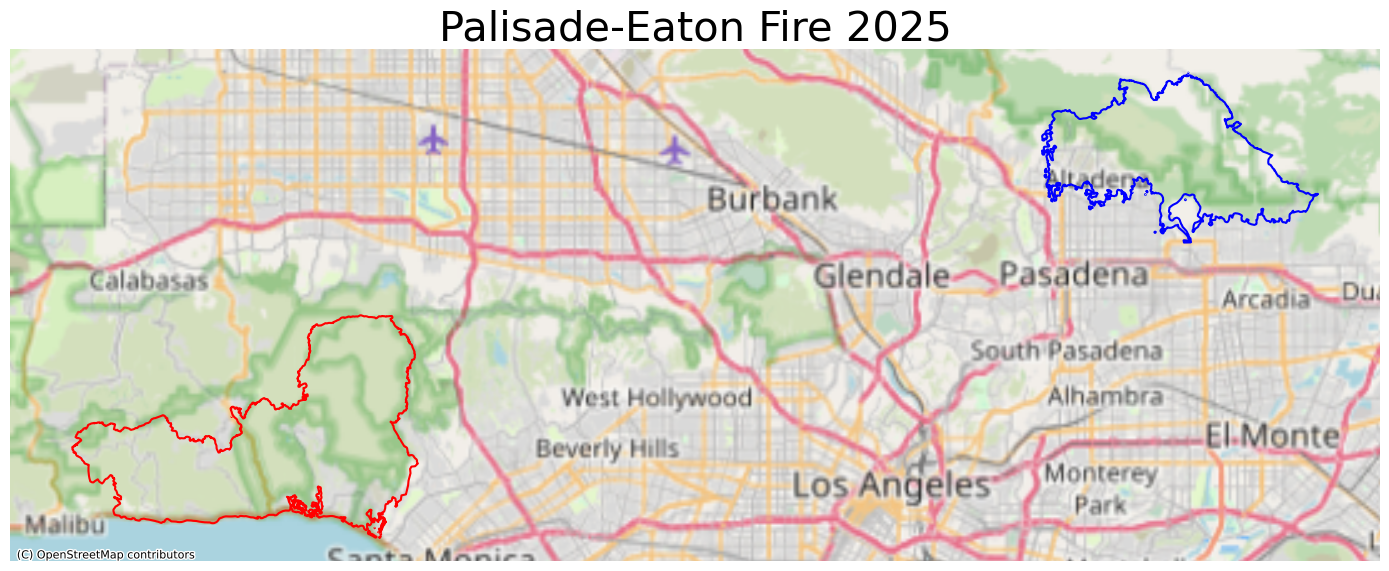

In [20]:
# Add basemap using contextily
fig, ax = plt.subplots(1, 1, figsize = (14, 12))

# ADD FIRE PERIMETERS: UPDATE FILL TRANSPARENCY AND COLOR
palisades.boundary.plot(ax = ax, color = 'red')
eaton.boundary.plot(ax = ax, color = 'blue')

# ADD TITLE
plt.title('Palisade-Eaton Fire 2025', fontsize = 30)
ax.axis('off')

ctx.add_basemap(ax, source = ctx.providers.OpenStreetMap.Mapnik, crs = palisades.crs)
plt.tight_layout()
plt.show()

## 6. Visualizing EJI Data  
Select a variable from metadata that may influence community wildfire response.

Update the variable name below.


In [34]:
# UPDATE WITH YOU EJI VARIABLE FROM STEP 1
eji_variable = 'E_AGE65'

In [35]:
# Find common min/max for legend range
vmin = min(census_within_palisades[eji_variable].min(), 
           census_within_eaton[eji_variable].min())

vmax = max(census_within_palisades[eji_variable].max(), 
           census_within_eaton[eji_variable].max())

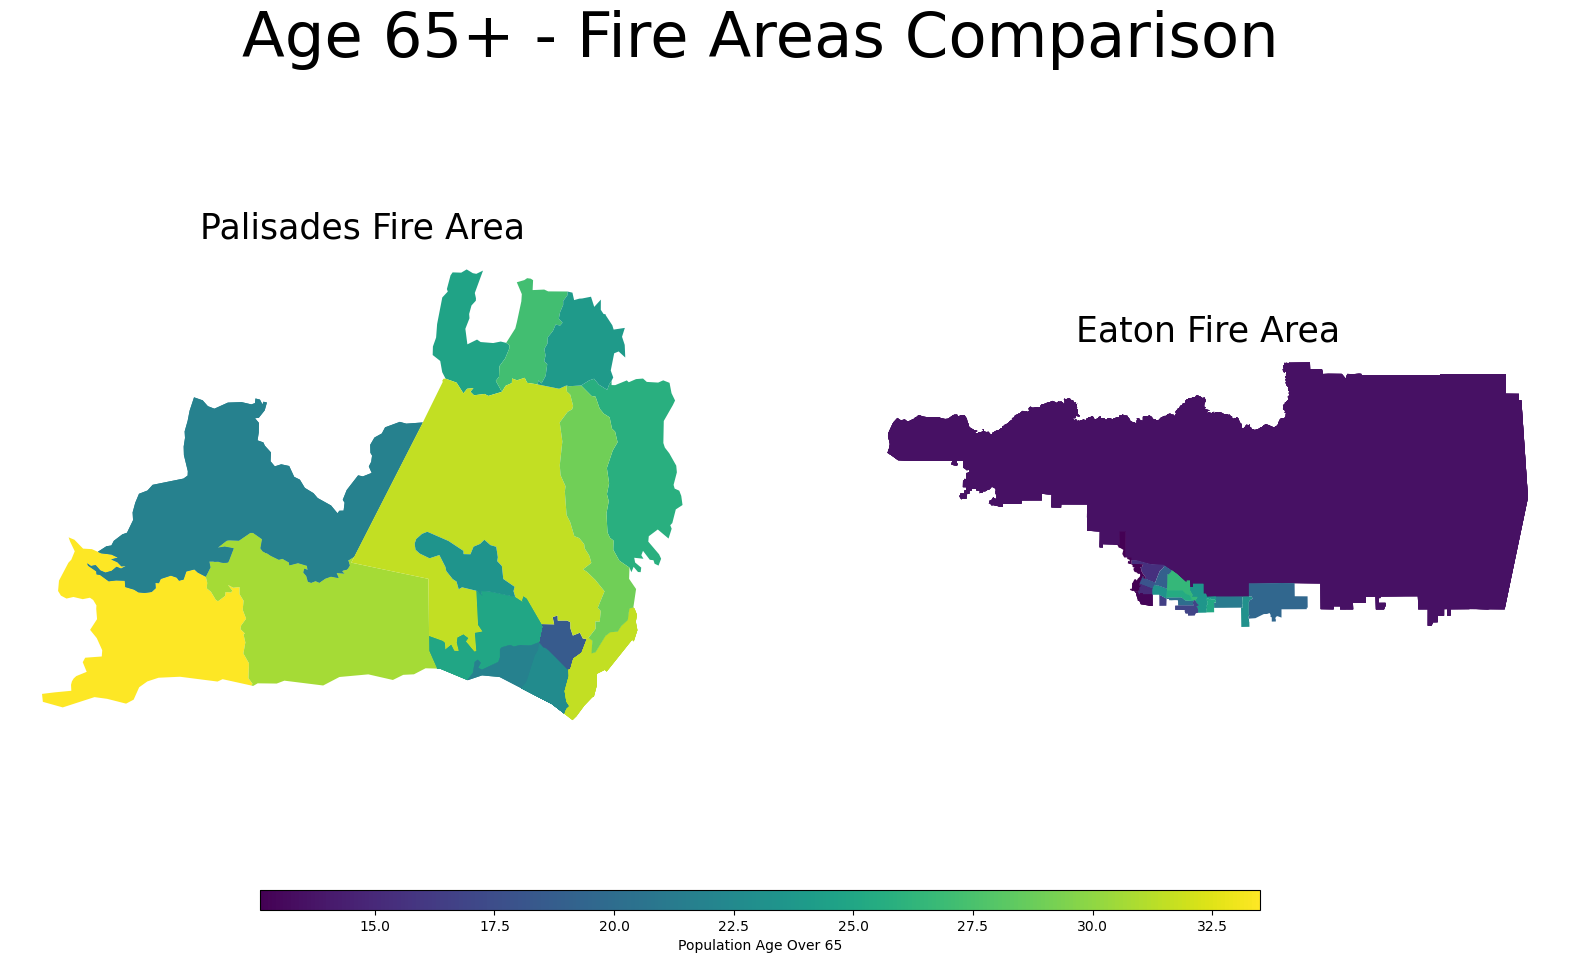

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))

# Plot census tracts within Palisades perimeter
census_within_palisades.plot(
    column = eji_variable,
    vmin = vmin, vmax = vmax,
    legend = False,
    ax = ax1)
ax1.set_title('Palisades Fire Area', fontsize = 25)
ax1.axis('off')

# Plot census tracts within Eaton perimeter
census_within_eaton.plot(
    column = eji_variable,
    vmin = vmin, vmax = vmax,
    legend = False,
    ax = ax2)
ax2.set_title('Eaton Fire Area', fontsize = 25)
ax2.axis('off')

# Add overall title
fig.suptitle('Age 65+ - Fire Areas Comparison', fontsize = 45)

# Add shared colorbar at the bottom
sm = plt.cm.ScalarMappable(norm = plt.Normalize(vmin = vmin, vmax = vmax))
cbar_ax = fig.add_axes([0.25, 0.08, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sm, cax = cbar_ax, orientation = 'horizontal')
cbar.set_label('Population Age Over 65')

plt.show()